# <span style="background-color: #dda0dd; color: black; border-left: 15px solid #FFD700;">Iris Classifier by Various Models</span>

<a href="https://www.linkedin.com/in/okinoleiba" style="">Okino Kamali Leiba</a>

In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, os

In [3]:
data_set = "./iris.csv"
iris_data = pd.read_csv(data_set, engine="c", delimiter=",", encoding="utf-8", header=0, on_bad_lines="warn")
iris_data["Species"].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], ['Iris-Setosa','Iris-Versicolor', 'Iris-Virginica'], regex=True, inplace=True)

C:\Users\okino\AppData\Local\Temp\ipykernel_43228\323650059.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  iris_data["Species"].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], ['Iris-Setosa','Iris-Versicolor', 'Iris-Virginica'], regex=True, inplace=True)


In [11]:
from io import StringIO
python_data = open(data_set).read()
lst_com = [list_item.split(",") for list_item in python_data.splitlines()]
# data_clip = pd.read_clipboard(python_data)
# data_table = pd.read_table(python_data)
data_csv = pd.read_csv(StringIO(python_data), header=0, sep=",", engine="c", lineterminator="\n", iterator=True, chunksize=100)

# https://matthewrocklin.com/blog/work/2017/10/16/streaming-dataframes-1

pd.DataFrame(lst_com)

,0,1,2,3,4,5
0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3.0,1.4,0.2,Iris-setosa
3,3,4.7,3.2,1.3,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa
...,...,...,...,...,...,...
146,146,6.7,3.0,5.2,2.3,Iris-virginica
147,147,6.3,2.5,5.0,1.9,Iris-virginica
148,148,6.5,3.0,5.2,2.0,Iris-virginica
149,149,6.2,3.4,5.4,2.3,Iris-virginica


## <span style="background-color: #dda0dd; color: black; border-left: 15px solid #FFD700;">Exploratory Data Analysis</span>

In [4]:
iris_data.index

RangeIndex(start=0, stop=150, step=1)

In [5]:
iris_data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
iris_data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
iris_data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [24]:
iris_data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-Setosa
1,2,4.9,3.0,1.4,0.2,Iris-Setosa
2,3,4.7,3.2,1.3,0.2,Iris-Setosa
3,4,4.6,3.1,1.5,0.2,Iris-Setosa
4,5,5.0,3.6,1.4,0.2,Iris-Setosa


In [10]:
iris_data.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


## <span style="background-color: #dda0dd; color: black; border-left: 15px solid #FFD700;">Set Figure Theme</span>

In [11]:
custom_params = {'figure.facecolor': 'orange',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': True,
 'ytick.right': True,
 'axes.grid': True,
 'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'black',
 'grid.color': 'white',
 'axes.spines.left': False,
 'axes.spines.bottom': False,
 'axes.spines.right': False,
 'axes.spines.top': False,
 'xtick.bottom': True,
 'ytick.left': True}
sns.set_theme(style="ticks", rc=custom_params)

## <span style="background-color: #dda0dd; color: black; border-left: 15px solid #FFD700;">Data Transformation and Preparation</span>

In [12]:
iris_data = iris_data.drop("Id", axis=1, errors="ignore", inplace=False)

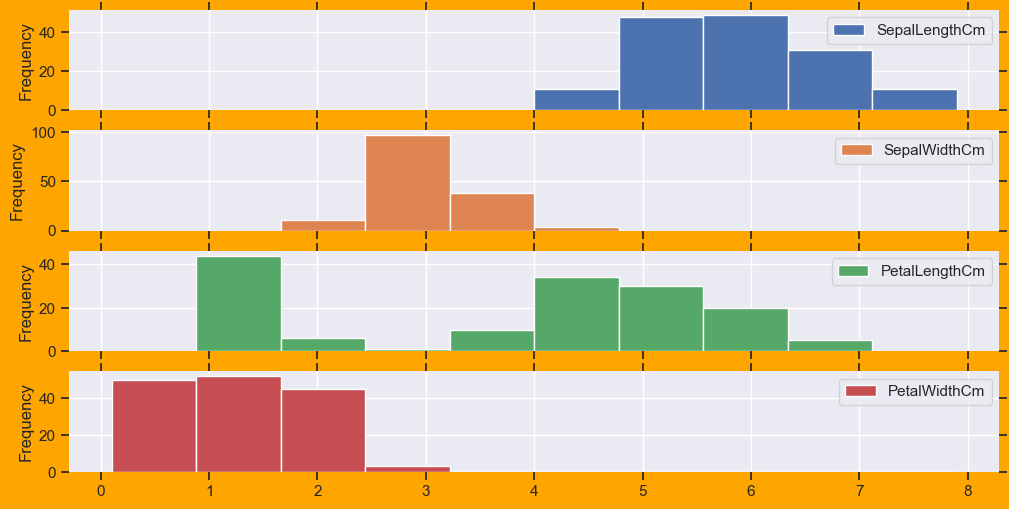

In [13]:

iris_data.plot.hist(subplots=True, figsize=(12,6),);

In [14]:
x = iris_data.drop("Species", axis=1, inplace=False, errors="ignore")
# X scale-min_max = (X — X min) / (X max — X min)
X = (x - np.min(x)) / (np.max(x) -np.min(x))
# X scale_MAS = x / max(abs|x|)
# X = x / np.max(np.abs(x))
# X z-score = (x - mean / (x - std)  *normal distribution
#   X = (x - np.mean(x)) / (x - np.std(x))
y = iris_data["Species"]

c:\ProgramData\Anaconda3\envs\conda_env\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\ProgramData\Anaconda3\envs\conda_env\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\ProgramData\Anaconda3\envs\conda_env\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.09, random_state=0)

## <span style="background-color: #dda0dd; color: black; border-left: 15px solid #FFD700;">Random Forest Classifier</span>

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

param_grid = {"n_estimators" : [50, 100, 150, 200], "max_depth" : [2, 4, 6, 8, 10], "min_samples_split" : [2, 4, 6, 8, 10], "min_samples_leaf" : [2, 4, 6, 8, 10], "max_features" : ["sqrt", 
"log2"], "random_state" : [0,42]}
search_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5, scoring = "f1_samples" )
search_grid.fit(X_train, y_train)
print(search_grid.best_params_)

rf = RandomForestClassifier(n_estimators=50, max_depth=2, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, random_state=0)
rf.fit(X_train, y_train)
print("Random Forest Classifier: ", rf.score(X_test, y_test))

{'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 0}
Random Forest Classifier:  0.9285714285714286


In [17]:
from sklearn.metrics import confusion_matrix
y_predict_rf = rf.predict(X_test)

cm_rf = confusion_matrix(y_test, y_predict_rf)
cm_rf

array([[3, 0, 0],
       [0, 7, 0],
       [0, 1, 3]], dtype=int64)

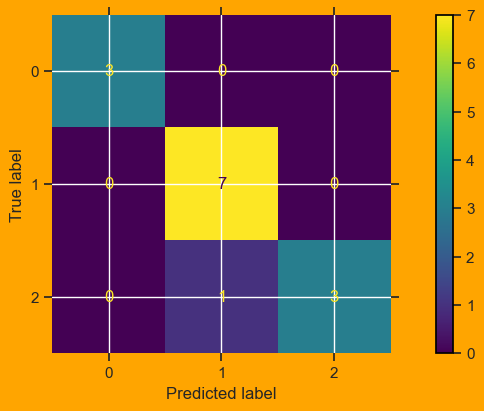

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
fig, axe = plt.subplots(figsize=(10,4), constrained_layout=True, dpi=100)
# cm_display = ConfusionMatrixDisplay(cm_rf).plot()
cm_display = ConfusionMatrixDisplay(cm_rf)
cm_display.plot(ax=axe);

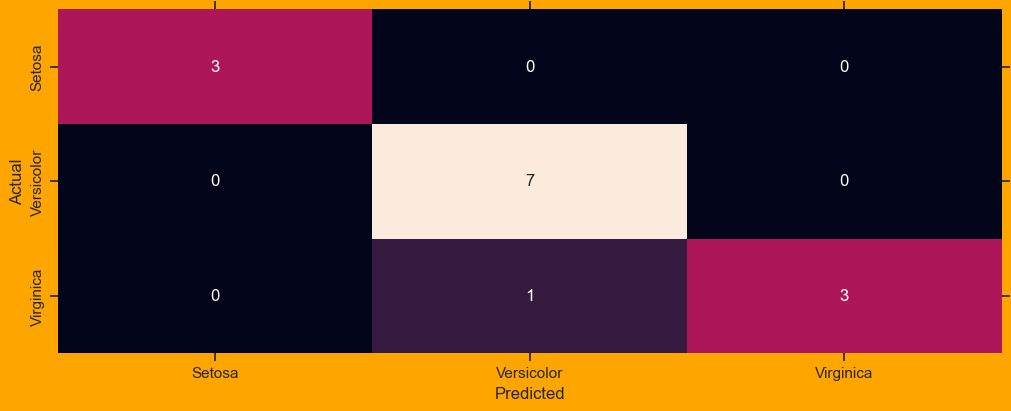

In [19]:
plt.figure(figsize=(10,4), constrained_layout=True, dpi=100)
axe = sns.heatmap(cm_rf, annot=True, fmt=".3g", cbar= False, xticklabels=["Setosa","Versicolor","Virginica"], yticklabels=["Setosa","Versicolor","Virginica"]);
axe.set_xlabel("Predicted");
axe.set_ylabel("Actual");


## <span style="background-color: #dda0dd; color: black; border-left: 15px solid #FFD700;">Support Vector Classifier</span>

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {"kernel" : ["linear", "poly", "rbf", "sigmoid"], "degree" : [3, 6, 9, 12, 15], "random_state" : [0, 42]  }
grid_search = GridSearchCV(SVC(), param_grid, refit=True, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

svc = SVC(kernel="linear", random_state=0, degree=3)
svc.fit(X_train, y_train)
print("Support Vector Classifier: ", svc.score(X_test, y_test))

{'degree': 3, 'kernel': 'linear', 'random_state': 0}
Support Vector Classifier:  0.9285714285714286


In [21]:
from sklearn.metrics import confusion_matrix
y_predict_svc = svc.predict(X_test)

cm_svc = confusion_matrix(y_test, y_predict_svc)
cm_svc

array([[3, 0, 0],
       [0, 7, 0],
       [0, 1, 3]], dtype=int64)

<Figure size 500x300 with 0 Axes>

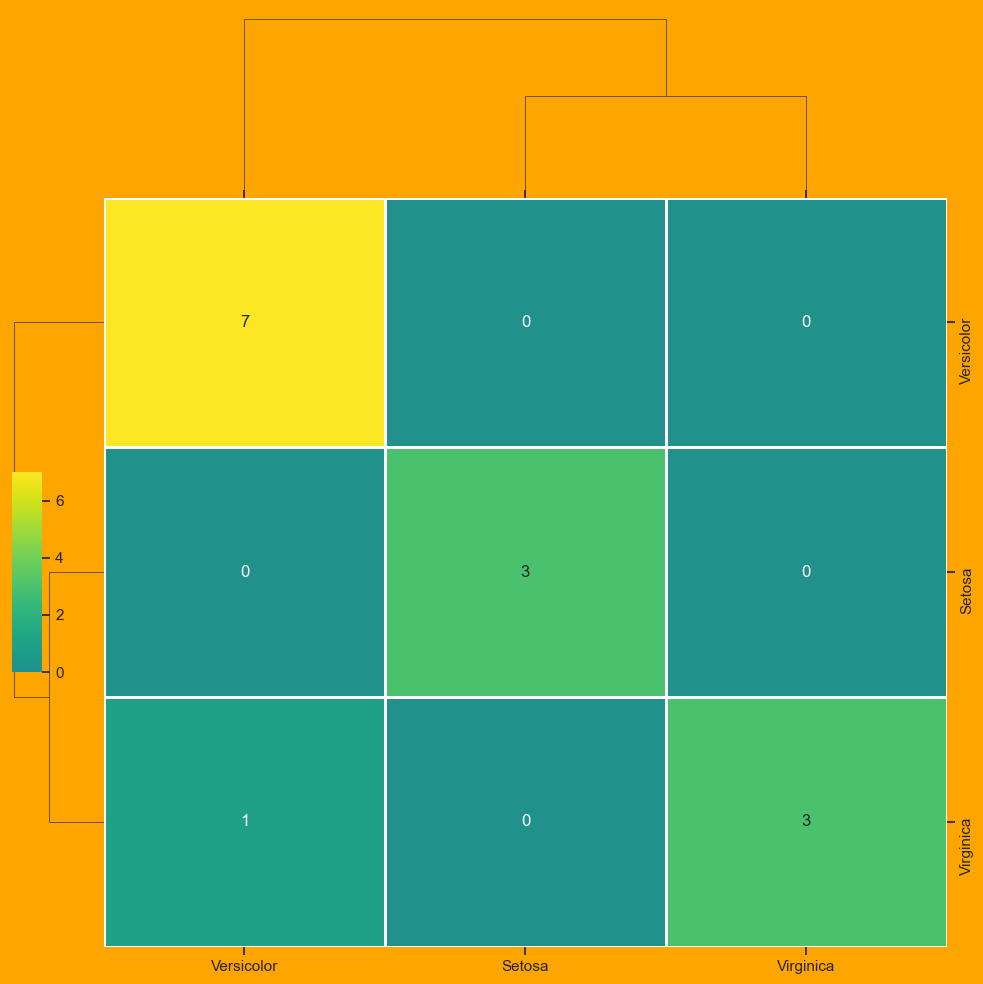

In [22]:
plt.figure(figsize=(5,3), constrained_layout=True, dpi=100)
sns.clustermap(cm_svc,  xticklabels=["Setosa","Versicolor","Virginica"], yticklabels=["Setosa","Versicolor","Virginica"], center=0, cmap="viridis", annot=True, dendrogram_ratio=(.1, .2), cbar_pos=(.02, .32, .03, .2), linewidths=.75)
plt.show()


<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

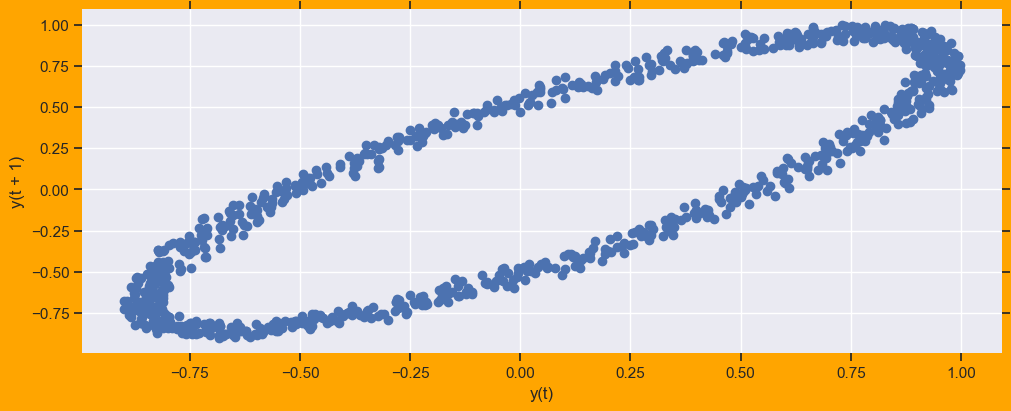

In [23]:
from pandas.plotting import lag_plot

plt.figure(figsize=(10,4), constrained_layout=True, dpi=100)

data = pd.Series(0.1 * np.random.rand(1000) + 0.9 * np.sin(np.linspace(-99 * np.pi, 99 * np.pi, num=1000)))

lag_plot(data)